## Treinamento parte 2

### Concluido

In [1]:
import sklearn
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# carregando o DataFrame limpo
df = pd.read_csv('Capitulo_1_arquivo_limpo.csv')

In [3]:
# verificando nosso no DataFrame
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [5]:
df.shape

(26664, 30)

In [6]:
# Examinando caracteristicas de histórico financeiro
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [7]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
# Examinando a primeira coluna de pagamentos 'PAY_1'
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [9]:
pay_feats[0]

'PAY_1'

<AxesSubplot:>

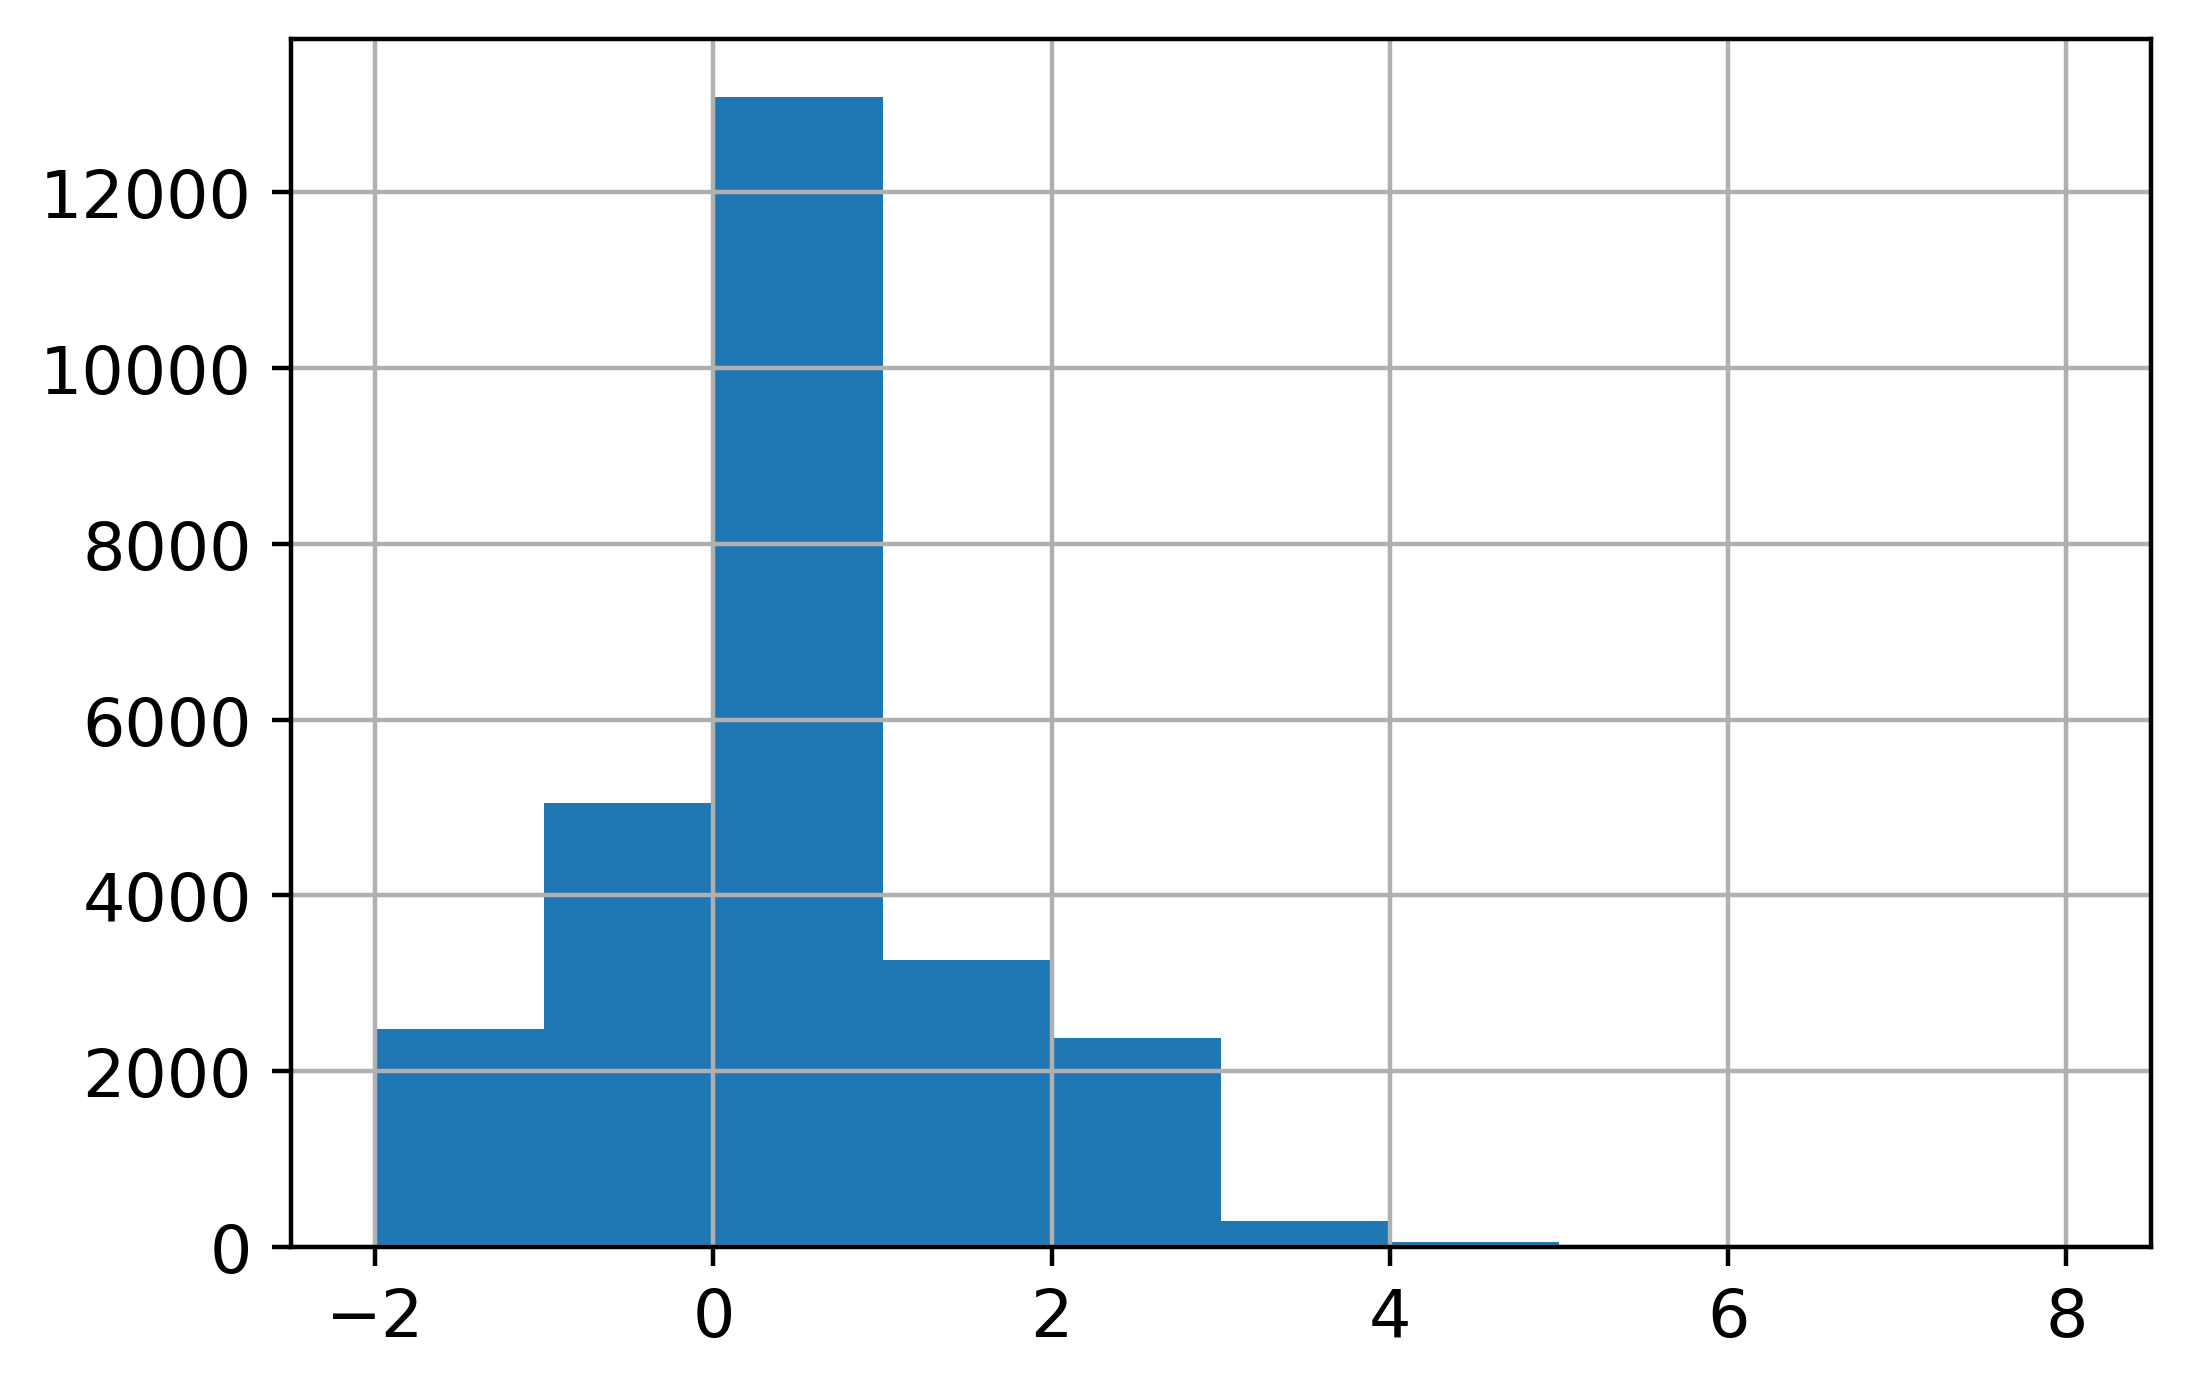

In [10]:
# Histograma de 'PAY_1' usando argumentos padrão
mpl.rcParams['figure.dpi']=400
mpl.rcParams['font.size']=12
df[pay_feats[0]].hist()

In [11]:
# criando um array de 12 numeros que resultará em 11 bins dedicados a cada um dos valores de 'PAY_1' (11)
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Numero de contas')

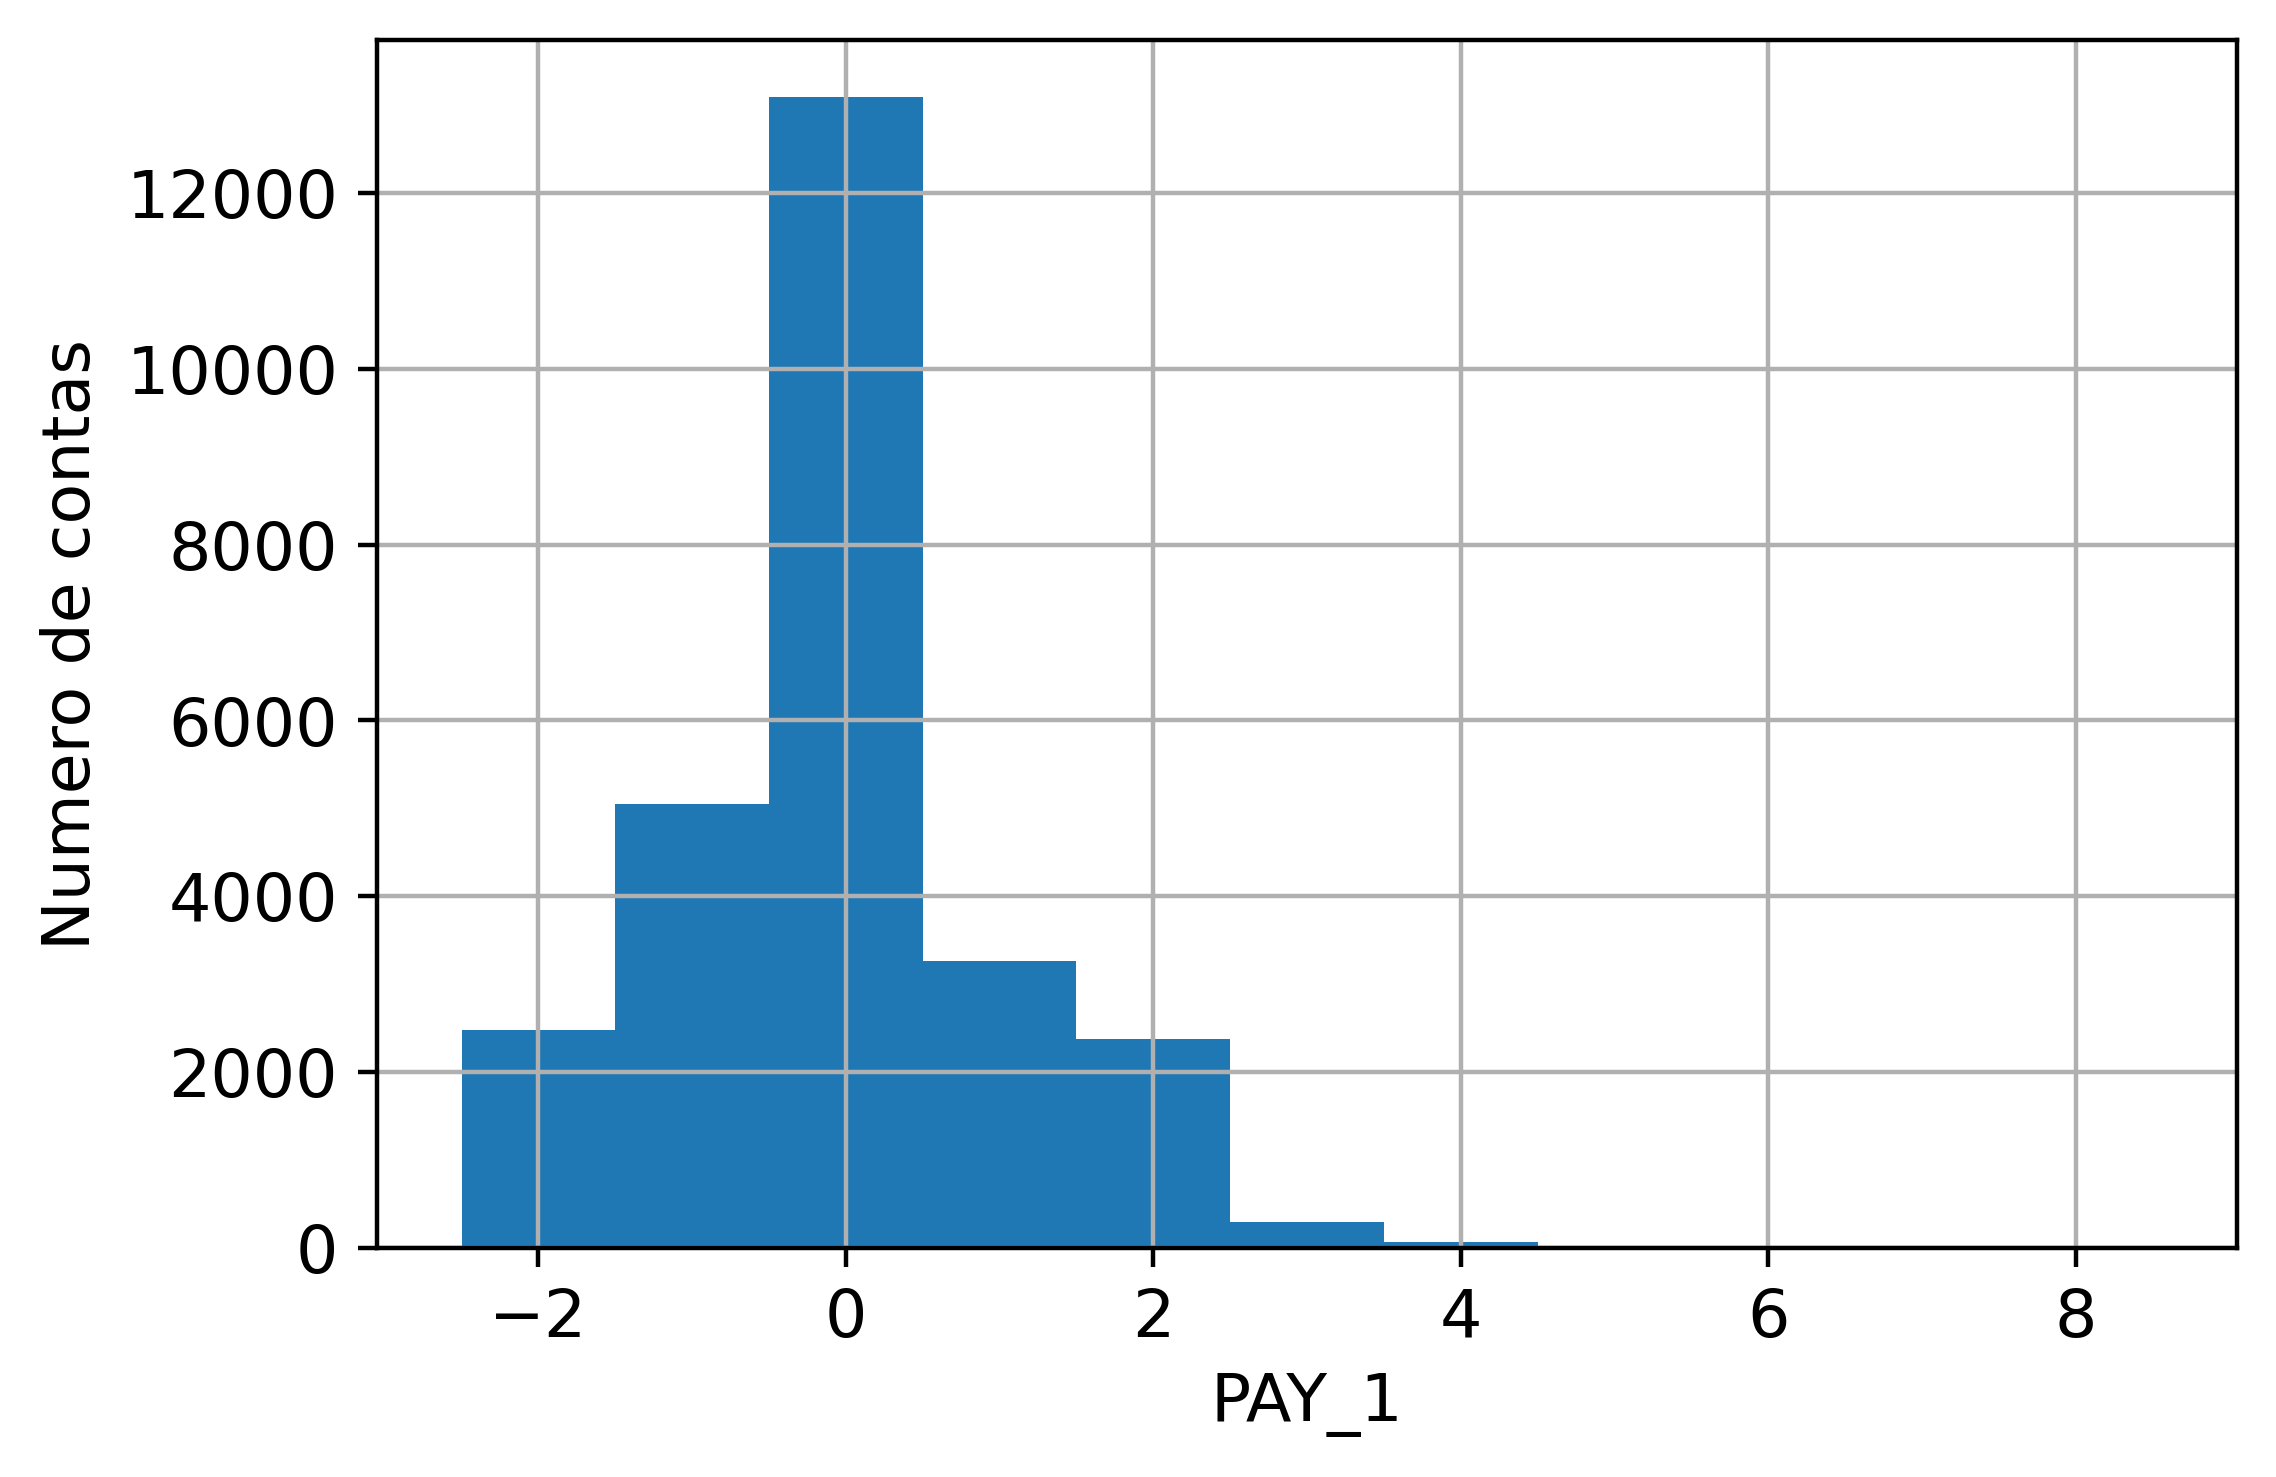

In [12]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Numero de contas')

###### O objetivo aqui foi verificar  a situação financeira das contas. Vimos que a maioria das contas está em boa situação(valores -2, -1 e 0). Para aquelas que não estão, é mais comum que o "atraso em meses" tenha um numero menor. Isso realmente faz sentido pois a maioria das pessoas estão pagando suas contas em dia. Caso contrário sua conta poderá ser fechada e enviada para uma agência de cobranças.

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

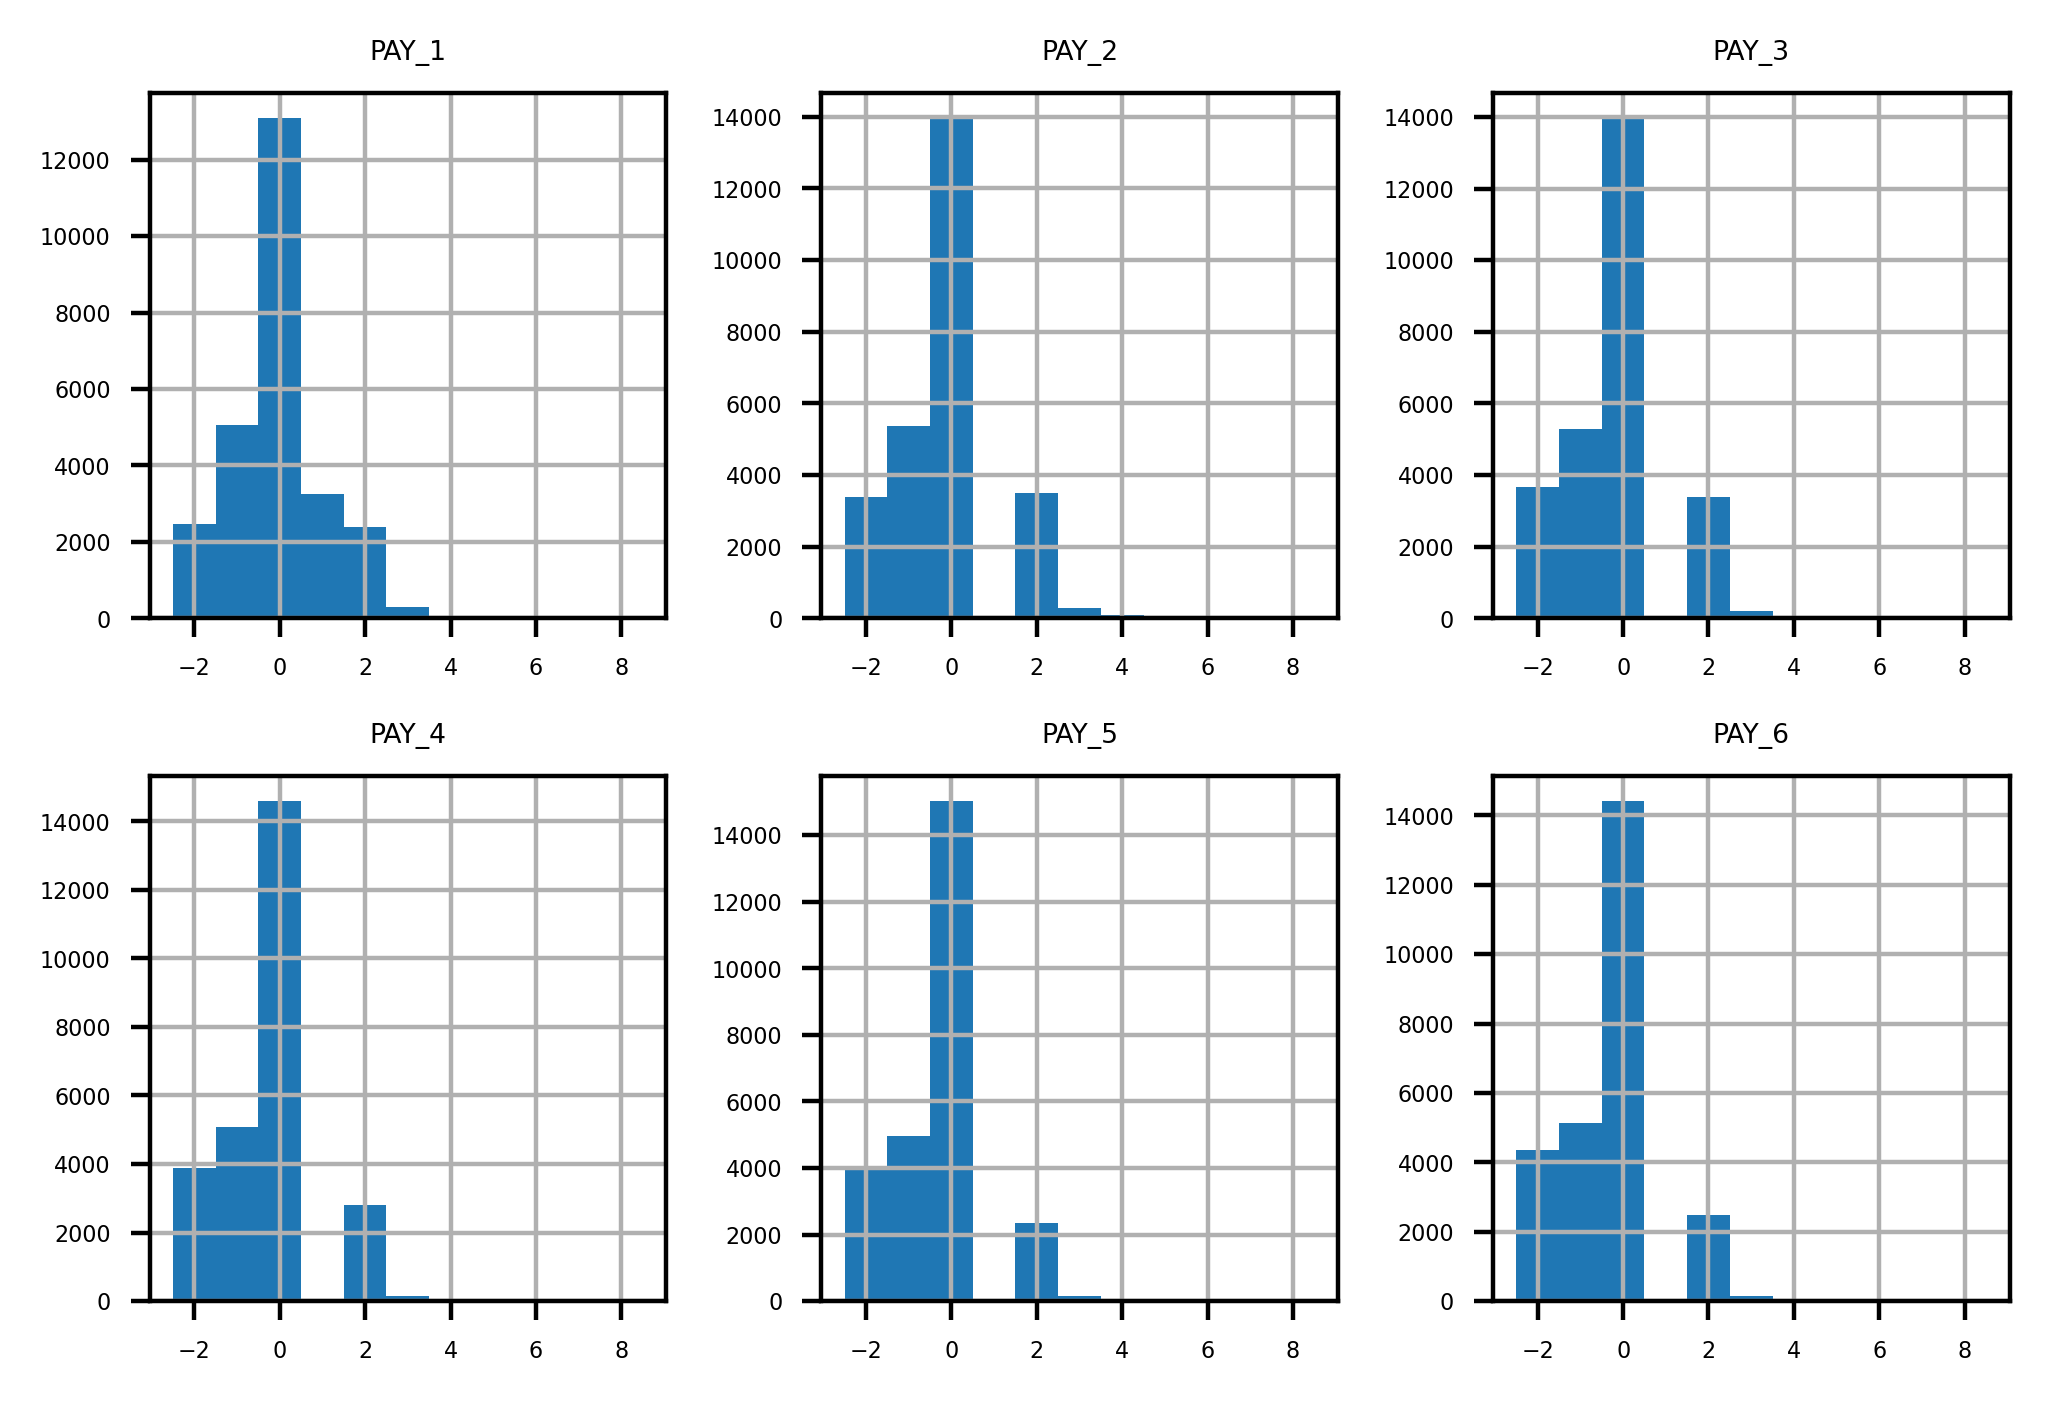

In [13]:

mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [14]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [15]:
df.value_counts()

ID             LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  EDUCATION_CAT    graduate school  high school  others  university
00026e48-d7d5  300000     2    1          2         31   -2     -2     -2     -2     -2     -2     1555        1599      900        11019      3452        57848     1603      902       11117     3462      58418     16994     0                           graduate school  1                0            0       0             1
aa9b7c93-cd4d  30000      2    2          1         22   -1     -1     -2     -1      0      0     4476        5814      5254       15570      10117       1875      5841      5280      15587     325       0         1400      1                           university       0                0            0       1             1
a96e44bb-c7ab  50000      1    2 

In [16]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047,0.221797,0.352985,0.164266,0.015527,0.467222
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185,0.415463,0.477907,0.370524,0.123637,0.498934
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.020000e+02,390.000000,294.750000,242.750000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Explorando as caracteristicas financeiras restantes

In [17]:
bill_feats =['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [18]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

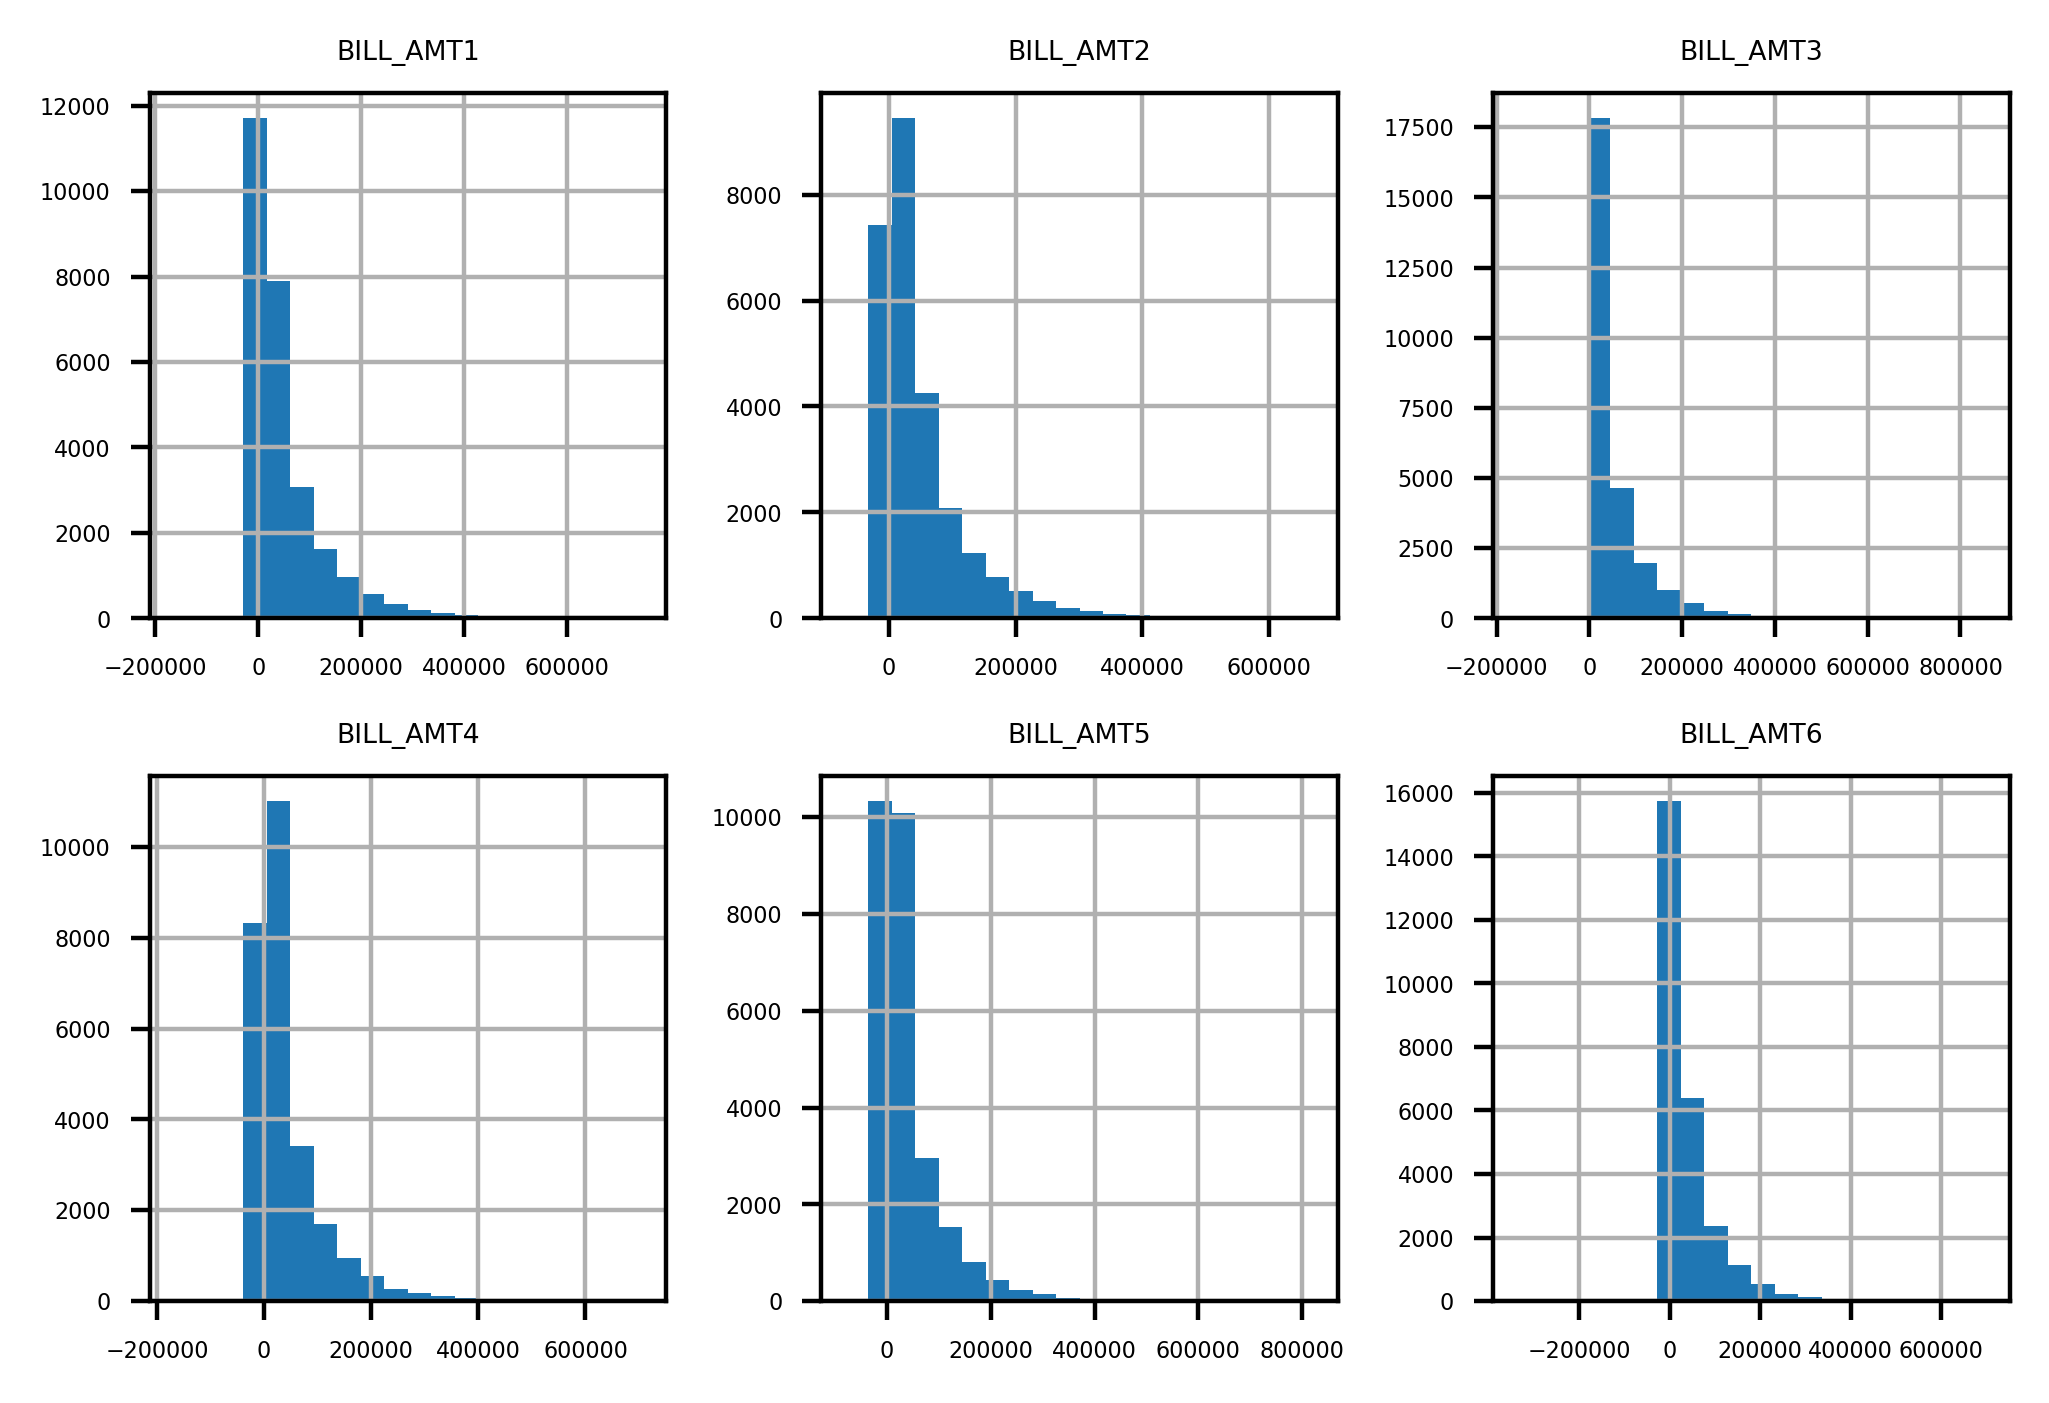

In [19]:
df[bill_feats].hist(bins=20, layout=(2,3))

In [20]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [21]:
# criando mascara booleana
pay_zero_mask = df[pay_feats] == 0

In [22]:
pay_zero_mask.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,False,False,False,False,False,False
1,False,False,True,True,True,False
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,False,True,False,True,True,True


In [23]:
pay_zero_mask.sum()

PAY_1    13087
PAY_2    13961
PAY_3    13968
PAY_4    14596
PAY_5    15032
PAY_6    14416
dtype: int64

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

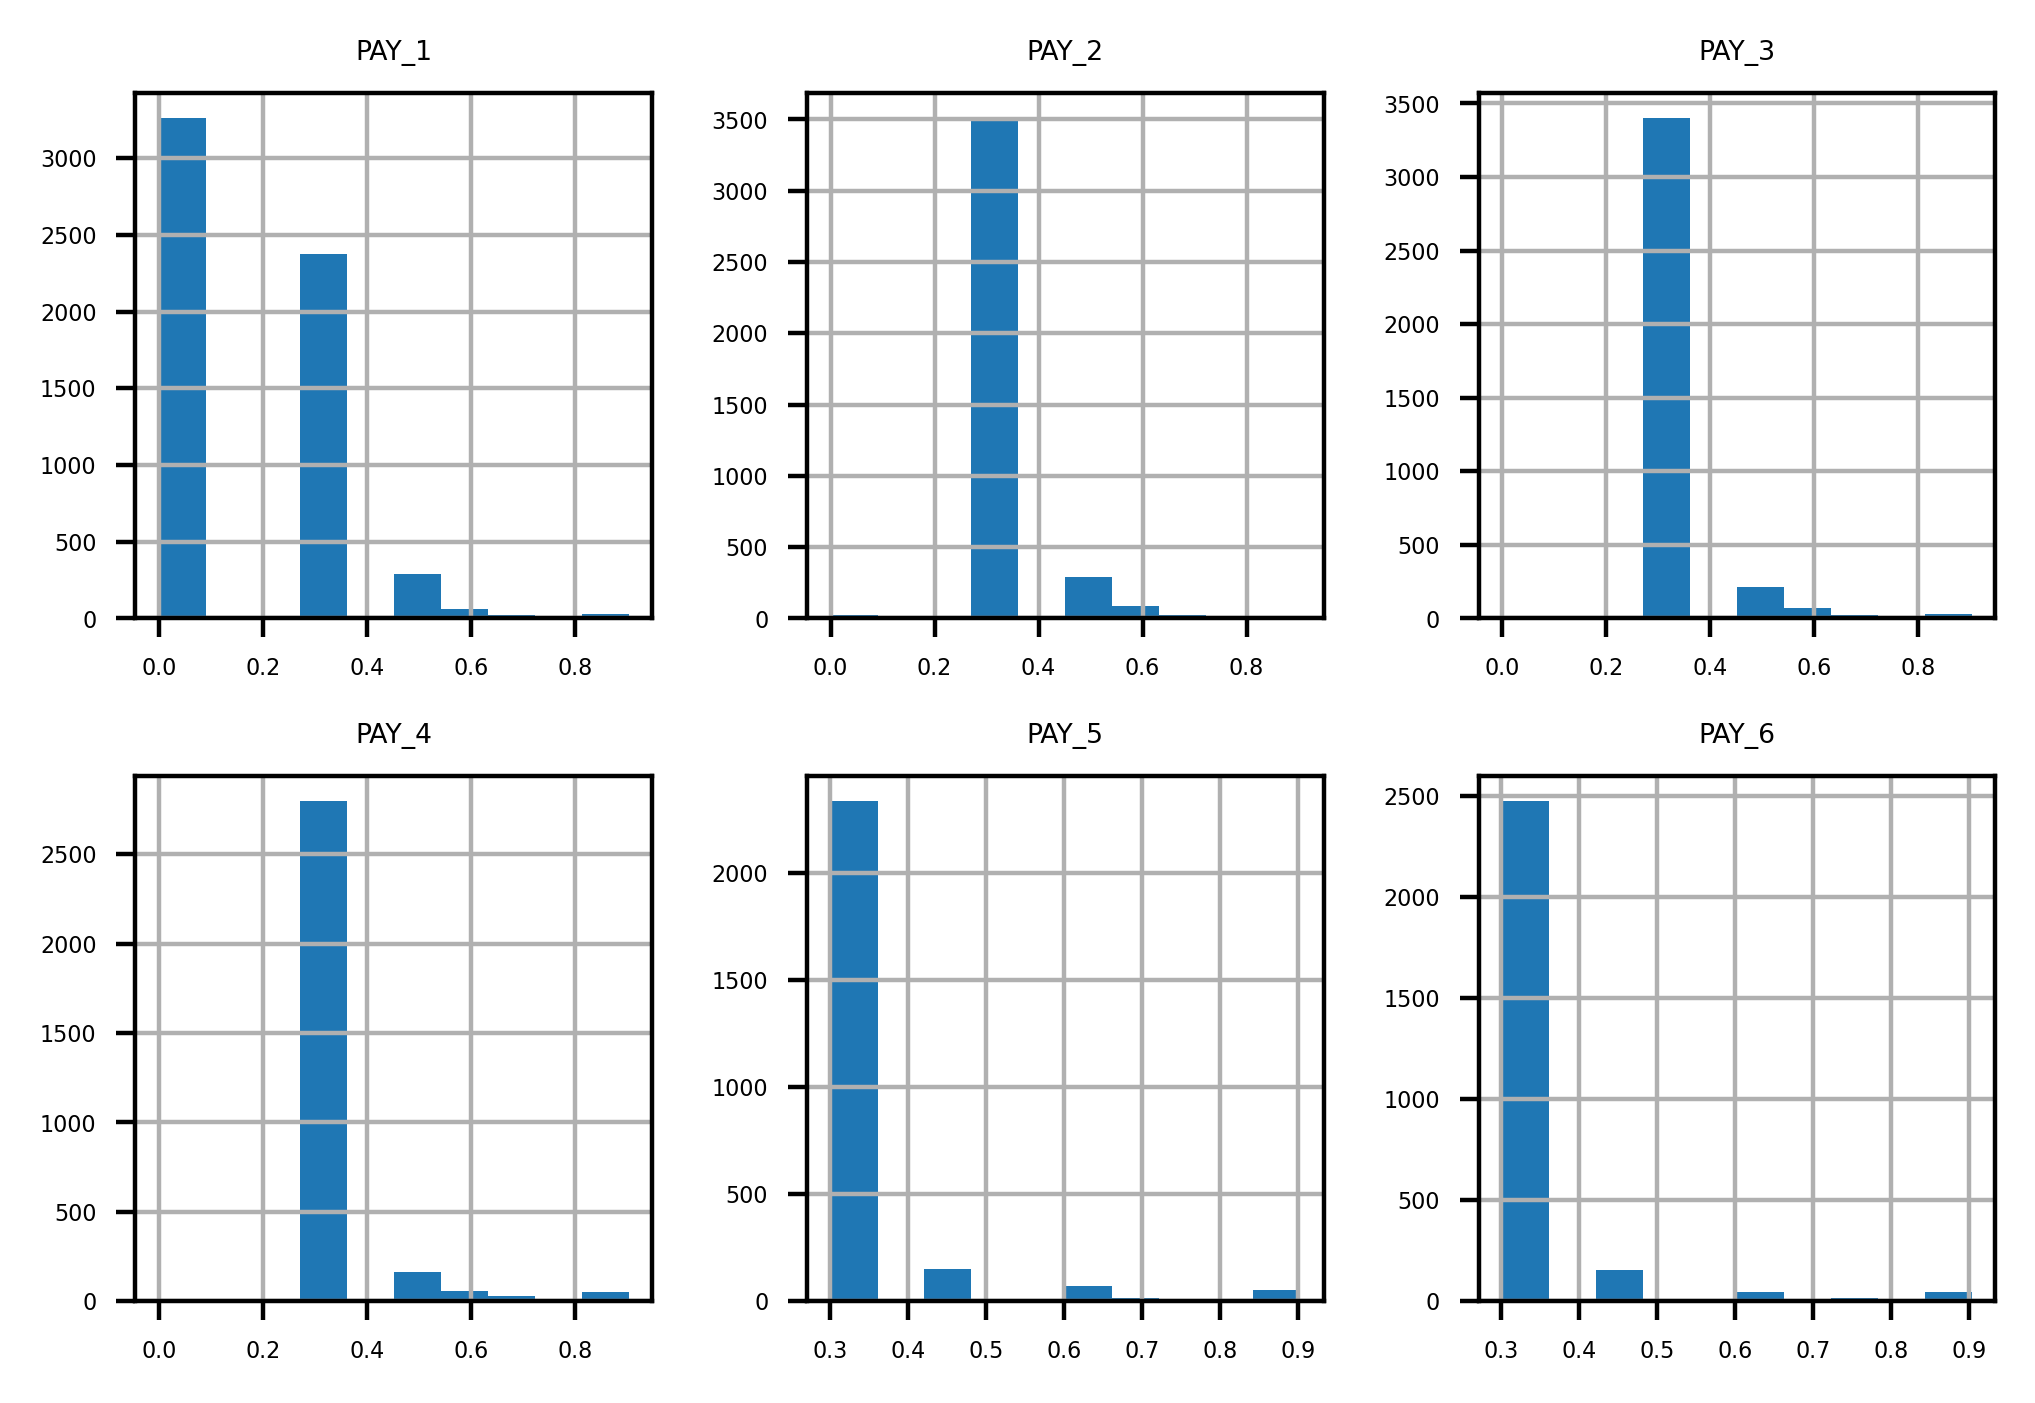

In [24]:
df[pay_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))

### Fim da parte 2!!